## Gradient-Descent

### Contents:

#### 1. Import Libraries
#### 2. Import Data
#### 3. Gradient Descent Optimization

### 1. Import Libraries

In [165]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

### 2. Import Data

In [166]:
# Define path
path = r'C:\Users\Lukman\Desktop\FEMINA CF\Machine Learning'


In [167]:
# Import data
climate = pd.read_csv(os.path.join(path, 'DataSet_scaled.csv'))
climate

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1           0.660514          -0.02793        0.826097   
1      19600102      1           0.244897          -0.02793        0.735760   
2      19600103      1           1.076130          -0.02793        1.277781   
3      19600104      1          -1.001953          -0.02793        1.458455   
4      19600105      1           0.244897          -0.02793        1.729466   
...         ...    ...                ...               ...             ...   
22945  20221027     10          -1.833187          -0.02793        0.284075   
22946  20221028     10           0.244897          -0.02793        0.103401   
22947  20221029     10          -0.586336          -0.02793        0.013064   
22948  20221030     10          -0.170720          -0.02793        0.374412   
22949  20221031     10          -0.170720          -0.02793        0.735760   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           -0.001949               -1.101066            -0.265148   
1           -0.001949               -1.058108             1.658760   
2           -0.001949               -1.251420             0.155707   
3           -0.001949               -0.821838            -0.445514   
4           -0.001949               -0.746661            -0.164944   
...               ...                     ...                  ...   
22945        1.037367               -0.005632            -0.004619   
22946        0.976231               -0.005632            -0.004619   
22947        0.716402               -0.005632            -0.004619   
22948        0.487141               -0.005632            -0.004619   
22949        0.196744               -0.005632            -0.004619   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0             -0.179228       -0.902918  ...             -0.443701   
1             -0.179228       -0.810126  ...              0.783085   
2             -0.179228       -1.065304  ...              0.783085   
3             -0.179228       -0.114186  ...              0.783085   
4             -0.179228        0.187388  ...             -1.670486   
...                 ...             ...  ...                   ...   
22945         -0.179228        0.720943  ...             -0.443701   
22946         -0.179228        0.187388  ...             -0.443701   
22947         -0.179228        0.349774  ...             -0.443701   
22948         -0.179228        0.280180  ...             -0.443701   
22949         -0.179228       -0.322968  ...             -0.443701   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...   

In [171]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [172]:
df

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101      1        -0.528623           -1.016876   
1      19600102      1        -0.582946           -1.107669   
2      19600103      1        -0.257010           -1.084971   
3      19600104      1        -0.555784           -1.209812   
4      19600105      1        -1.003946           -1.209812   
...         ...    ...              ...                 ...   
22945  20221027     10         0.747959            0.628750   
22946  20221028     10         0.856604            0.367720   
22947  20221029     10         0.856604            0.083991   
22948  20221030     10         0.680055            0.265577   
22949  20221031     10         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0 

In [173]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

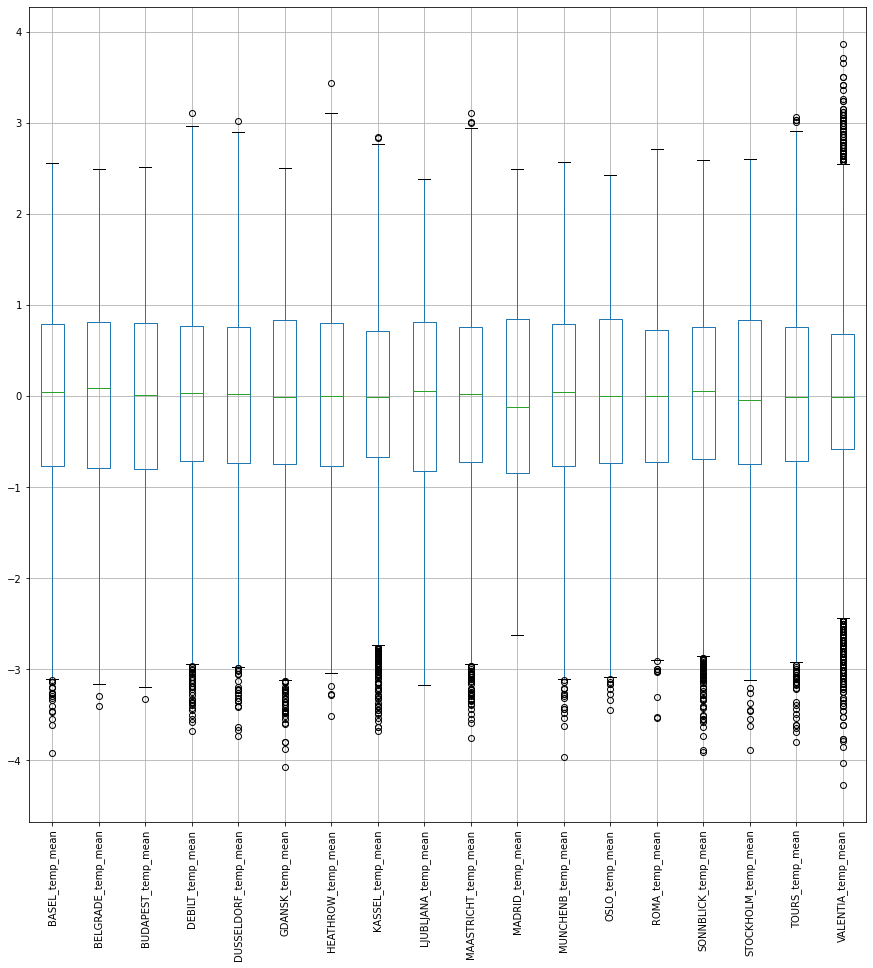

In [174]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

## Gradient Descent Optimization

### 2021 DEBILT Data

In [190]:
#Reduce the dataset to 2021
df2021 = df[df['DATE'].astype(str).str.contains('^2021')] #select 2021 data HERE
df2021

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
22281  20210101      1        -1.112591           -0.653703   
22282  20210102      1        -1.221236           -0.551561   
22283  20210103      1        -1.384204           -0.415371   
22284  20210104      1        -1.329882           -0.517514   
22285  20210105      1        -1.384204           -0.699100   
...         ...    ...              ...                 ...   
22641  20211227     12        -0.515042           -1.277907   
22642  20211228     12        -0.012558           -1.130368   
22643  20211229     12        -0.107623           -0.846639   
22644  20211230     12         0.354120           -0.846639   
22645  20211231     12        -0.216268           -0.392673   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
22281           -0.005167         -1.111156             -1.239786   
22282           -0.005167         -1.016223             -1.195607   
22283           -0.005167         -1.063690             -1.136700   
22284           -0.005167         -1.142801             -1.269240   
22285           -0.005167         -1.126979             -1.239786   
...                   ...               ...                   ...   
22641           -0.005167         -0.699778             -0.621268   
22642           -0.005167         -0.193467             -0.297282   
22643           -0.005167         -0.082711             -0.150016   
22644           -0.005167          0.455245              0.424323   
22645           -0.005167          0.439422              0.380143   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
22281         -1.272886           -1.713826         -0.005705   
22282         -1.081061           -1.504171         -0.005705   
22283         -1.042696           -1.381872         -0.005705   
22284         -0.940389           -1.259573         -0.005705   
22285         -0.799717           -1.399343         -0.005705   
...                 ...                 ...               ...   
22641         -2.180860           -0.473366         -0.005705   
22642         -1.925093           -0.211297         -0.005705   
22643         -1.285675           -0.001641         -0.005705   
22644         -0.876447            0.208014         -0.005705   
22645         -0.237030            0.452612         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
22281            -0.995445             -1.222313         -1.473528   
22282            -0.741156             -1.282325         -1.716151   
22283            -0.862246             -1.207310         -1.608319   
22284            -0.886464             -1.297328         -1.648756   
22285            -0.874355             -1.267322         -1.810505   
...                    ...                   ...               ...   
22641            -0.910682             -0.292124         -0.368242   
22642            -0.595848             -0.142094         -0.476075   
22643            -0.971227             -0.052075         -0.691740   
22644            -0.910682              0.503038         -0.691740   
22645            -1.068099              0.383013         -0.637824   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
22281           -1.107756       -0.744778       -0.000746   
22282           -1.271132       -0.671969       -0.000746   
22283           -1.208295       -0.951071       -0.000746   
22284           -1.245997       -1.145228       -0.000746   
22285           -1.296267       -1.582083       -0.000746   
...                   ...             ...             ...   
22641           -0.554792       -1.812645       -0.000746   
22642           -0.328579       -1.387925       -0.000746   
22643           -0.114934       -1.497139       -0.000746   
22644            0.400329       -0.853992       -0.000746   
22645            0.412896       -0.963205       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
22

In [191]:
df2021.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.650000e+02  365.000000       365.000000          365.000000   
mean   2.021067e+07    6.526027         0.032909            0.128766   
std    3.454755e+02    3.452584         0.949455            1.005278   
min    2.021010e+07    1.000000        -2.212624           -2.049648   
25%    2.021040e+07    4.000000        -0.745913           -0.631005   
50%    2.021070e+07    7.000000        -0.012558           -0.040850   
75%    2.021100e+07   10.000000         0.883765            0.935177   
max    2.021123e+07   12.000000         2.078863            2.263027   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count        3.650000e+02        365.000000            365.000000   
mean        -5.166671e-03          0.072520              0.013712   
std          5.211314e-17          0.966594              0.975583   
min         -5.166671e-03         -2.503513             -2.668269   
25%         -5.166671e-03         -0.683956             -0.680175   
50%         -5.166671e-03          0.043867             -0.061656   
75%         -5.166671e-03          0.993200              0.880848   
max         -5.166671e-03          2.211512              2.559684   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        365.000000          365.000000      3.650000e+02   
mean           0.088705            0.085045     -5.705221e-03   
std            1.066883            1.010767      4.777038e-17   
min           -2.986526           -2.185550     -5.705221e-03   
25%           -0.748564           -0.683021     -5.705221e-03   
50%           -0.006839           -0.001641     -5.705221e-03   
75%            1.029017            0.994221     -5.705221e-03   
max            2.320641            2.391923     -5.705221e-03   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           365.000000            365.000000        365.000000   
mean              0.101863              0.062647          0.089456   
std               1.014904              0.964474          1.009745   
min              -1.855184             -2.572588         -2.470980   
25%              -0.704829             -0.667200         -0.664782   
50%              -0.087270             -0.022069         -0.085181   
75%               0.941995              0.923123          0.817918   
max               2.092351              2.423428          2.489325   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          365.000000      365.000000    3.650000e+02   
mean             0.090138        0.102767   -7.461638e-04   
std              0.926124        1.061531    4.559900e-18   
min             -2.125714       -2.152421   -7.461638e-04   
25%             -0.667898       -0.574890   -7.461638e-04   
50%              0.035875        0.068257   -7.461638e-04   
75%              0.865322        1.063315   -7.461638e-04   
max              2.109492        2.082643   -7.461638e-04   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           365.000000           365.000000       365.000000   
mean              0.045401             0.099155         0.116518   
std               1.026706             1.048349         0.985446   
min              -2.815348            -2.294481        -2.281025   
25%              -0.636209            -0.577681        -0.649512   
50%               0.036546             0.019467         0.056432   
75%               0.855551             0.940070         0.966314   
max               2.215685             2.358296         2.111511   

       VALENTIA_temp_mean  
count        3.650000e+02  
mean        -7.287352e-03  
std          4.603327e-17  
min         -7.287352e-03  
25%         -7.287352e-03  
50%         -7.287352e-03  
75%         -7.287352e-03  
max         -7.287352e-03

In [192]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp2021= df2021.drop(['DATE','MONTH'], axis=1)

In [193]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

fig = go.Figure(data=[go.Surface(z=notemp2021.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [194]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [195]:
n_rows = df2021.shape[0]
n_rows

365

In [196]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df2021['DEBILT_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [197]:
X.shape, y.shape

((365, 2), (365, 1))

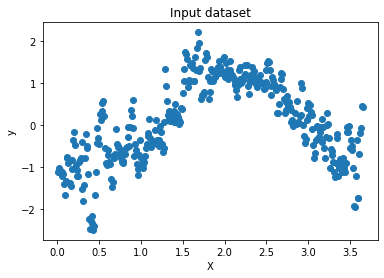

In [199]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=df2021['DEBILT_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [200]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
df2021['DEBILT_temp_mean'].min()

-2.503512732997806

In [201]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
df2021['DEBILT_temp_mean'].max()

2.2115122447500486

In [202]:
#This computes the loss function for the gradiant descent. 

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [203]:
compute_cost(X,y)

array([0.46850143])

In [204]:
#This is the gradiant descent function. 

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [210]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=50 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 0 ns
Wall time: 42.1 ms


In [211]:
theta

array([[-0.10088833],
       [ 0.13180733]])

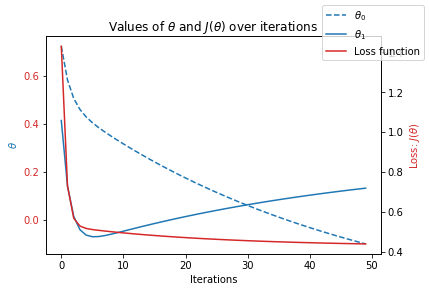

In [212]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [213]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.67 s
Wall time: 3.02 s


In [214]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

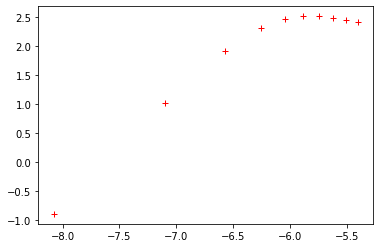

In [209]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [217]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=100 #<---start with the same iterations as above
theta_init=np.array([[0.1],[0.1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

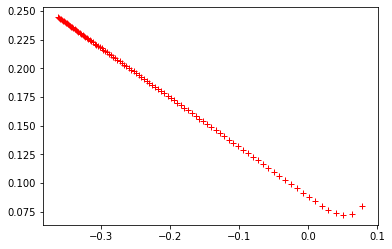

In [218]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

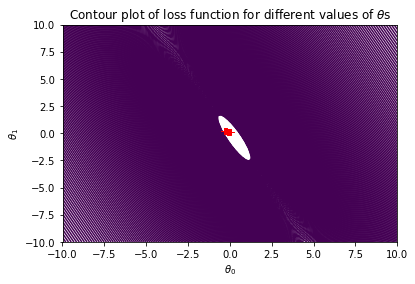

In [219]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');

### 2016 DUSSELDORF Data

In [220]:
#Reduce the dataset to 2016
df2016 = df[df['DATE'].astype(str).str.contains('^2020')] #select 2020 data HERE
df2016

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
21915  20200101      1        -1.465688           -1.209812   
21916  20200102      1        -1.397785           -1.141717   
21917  20200103      1        -0.691591           -1.357351   
21918  20200104      1        -0.596526           -1.504889   
21919  20200105      1        -1.180494           -1.050924   
...         ...    ...              ...                 ...   
22276  20201227     12        -1.180494           -1.130368   
22277  20201228     12        -0.786655           -0.528863   
22278  20201229     12        -0.813817           -0.131643   
22279  20201230     12        -1.058269           -0.052199   
22280  20201231     12        -1.153333           -0.460768   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
21915           -0.934476         -1.459245             -1.387053   
21916           -1.169744         -0.968756             -1.225060   
21917           -1.569699         -0.383334             -0.444548   
21918           -1.063873         -0.525734             -0.827441   
21919           -1.040346         -0.494089             -0.635995   
...                   ...               ...                   ...   
22276           -1.369721         -0.794712             -0.871621   
22277           -0.863895         -1.016223             -0.945254   
22278           -0.346305         -1.000401             -1.357599   
22279           -0.499230         -0.921290             -1.048340   
22280           -0.734498         -1.253556             -1.151427   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
21915         -0.735776           -1.102331         -0.005705   
21916         -0.953178           -0.595665         -0.005705   
21917         -0.799717           -0.386009         -0.005705   
21918         -0.556739           -0.980032         -0.005705   
21919         -0.722987           -0.648078         -0.005705   
...                 ...                 ...               ...   
22276         -1.017119           -0.875205         -0.005705   
22277         -0.710199           -1.783711         -0.005705   
22278         -0.480009           -1.539113         -0.005705   
22279         -0.838082           -1.521642         -0.005705   
22280         -1.119426           -2.115665         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
21915            -1.370824             -1.612392         -1.123071   
21916            -1.625113             -0.997267         -1.203946   
21917            -1.419260             -0.397145         -1.500486   
21918            -1.104426             -0.772222         -1.069155   
21919            -1.225516             -0.637194         -1.176988   
...                    ...                   ...               ...   
22276            -1.382933             -0.877243         -1.635277   
22277            -1.261843             -1.087286         -1.244383   
22278            -0.947009             -1.207310         -1.406132   
22279            -0.934900             -1.012270         -1.365695   
22280            -1.019663             -1.147298         -1.635277   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
21915           -1.032352       -0.550620       -0.000746   
21916           -1.321402       -0.283654       -0.000746   
21917           -0.693033       -0.235114       -0.000746   
21918           -0.592494       -0.696239       -0.000746   
21919           -0.818707       -0.793317       -0.000746   
...                   ...             ...             ...   
22276           -1.396806       -0.429272       -0.000746   
22277           -1.095189       -0.623429       -0.000746   
22278           -0.781005       -0.502081       -0.000746   
22279           -0.856409       -0.574890       -0.000746   
22280           -0.969515       -0.756913       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
21

In [221]:
df2016.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   2.020067e+07    6.513661         0.236087            0.191498   
std    3.457653e+02    3.455958         0.934854            0.915643   
min    2.020010e+07    1.000000        -1.682979           -1.629730   
25%    2.020040e+07    4.000000        -0.552389           -0.560073   
50%    2.020070e+07    7.000000         0.238684            0.237205   
75%    2.020098e+07    9.750000         0.978830            0.986248   
max    2.020123e+07   12.000000         2.309734            1.945251   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean             0.172345          0.263519              0.226841   
std              0.923699          0.880960              0.905961   
min             -1.581463         -1.490890             -1.607952   
25%             -0.590396         -0.430800             -0.503455   
50%              0.177166          0.233733              0.173970   
75%              0.947669          0.898267              0.851395   
max              1.935795          2.686179              2.500777   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000      3.660000e+02   
mean           0.246097            0.241620     -5.705221e-03   
std            0.815164            0.974223      4.777020e-17   
min           -1.336828           -2.115665     -5.705221e-03   
25%           -0.425658           -0.508308     -5.705221e-03   
50%            0.140227            0.103186     -5.705221e-03   
75%            0.949090            1.029164     -5.705221e-03   
max            2.039297            3.038360     -5.705221e-03   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean              0.170559              0.279836          0.145252   
std               0.916080              0.913584          1.003402   
min              -1.625113             -1.732417         -1.635277   
25%              -0.644284             -0.427152         -0.637824   
50%               0.209401              0.232983         -0.091921   
75%               0.923832              0.949378          0.996516   
max               1.934934              2.783501          2.327576   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000    3.660000e+02   
mean             0.250035        0.275909   -7.461638e-04   
std              0.875189        0.783143    4.451314e-18   
min             -1.434508       -1.290846   -7.461638e-04   
25%             -0.476246       -0.356463   -7.461638e-04   
50%              0.293506        0.110729   -7.461638e-04   
75%              0.953293        0.866124   -7.461638e-04   
max              2.147194        2.203991   -7.461638e-04   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean              0.256961             0.295811         0.319435   
std               0.888164             0.788996         0.922377   
min              -2.113343            -1.075304        -1.543707   
25%              -0.292519            -0.328869        -0.414197   
50%               0.248609             0.112771         0.323121   
75%               0.914051             0.949400         0.966314   
max               2.230310             2.159246         2.660579   

       VALENTIA_temp_mean  
count        3.660000e+02  
mean        -7.287352e-03  
std          4.603310e-17  
min         -7.287352e-03  
25%         -7.287352e-03  
50%         -7.287352e-03  
75%         -7.287352e-03  
max         -7.287352e-03

In [226]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp2016 = df2016.drop(['DATE','MONTH'], axis=1)

In [228]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notemp2016.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [229]:
#We need to make an index for the year. Create a set of data from 1 to 366 (2020 a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [230]:
n_rows = df2016.shape[0]
n_rows

366

In [231]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df2016['DUSSELDORF_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [232]:
X.shape, y.shape

((366, 2), (366, 1))

In [233]:
dfyear['DUSSELDORF_temp_mean'].min()

-1.3723261158274027

In [234]:
dfyear['DUSSELDORF_temp_mean'].max()

1.779172504864358

In [235]:
#This computes the loss function for the gradiant descent. 

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [236]:
compute_cost(X,y)

array([0.43498979])

In [237]:
#This is the gradiant descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [244]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=50 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 0 ns
Wall time: 36.9 ms


In [245]:
theta

array([[-0.01245538],
       [ 0.13396651]])

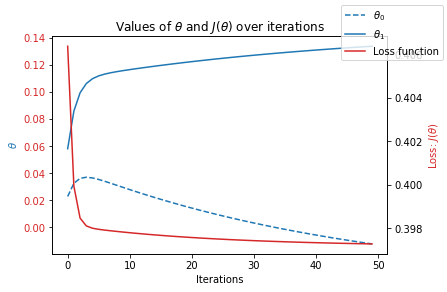

In [246]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [247]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.42 s
Wall time: 2.89 s


In [248]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

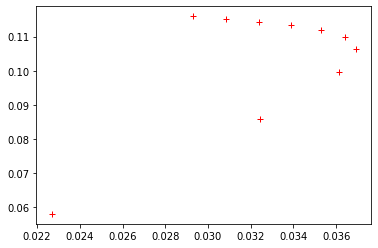

In [243]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [249]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=100 #<---start with the same iterations as above
theta_init=np.array([[0.1],[0.05]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

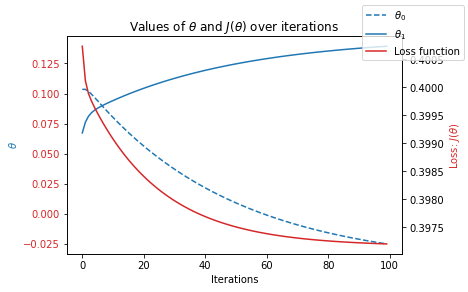

In [250]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history1, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history1, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history1, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()


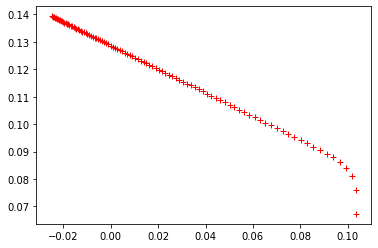

In [251]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()


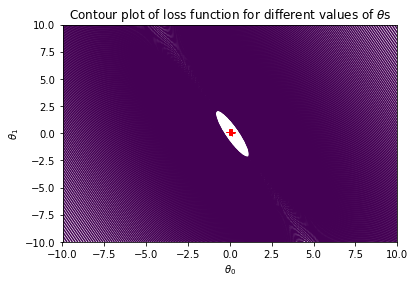

In [252]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

### 1980 HEATHROW Data

In [253]:
#Reduce the dataset to 2021
df1980 = df[df['DATE'].astype(str).str.contains('^1980')] #select 1980 data HERE
df1980

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
7305  19800101      1        -1.520011           -1.504889   
7306  19800102      1        -1.642237           -1.629730   
7307  19800103      1        -1.492850           -1.720523   
7308  19800104      1        -1.533592           -2.106394   
7309  19800105      1        -1.003946           -1.902110   
...        ...    ...              ...                 ...   
7666  19801227     12        -1.316301           -1.300605   
7667  19801228     12        -1.601495           -1.300605   
7668  19801229     12        -1.778043           -1.346001   
7669  19801230     12        -1.750882           -1.436795   
7670  19801231     12        -1.682979           -1.663777   

      BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
7305           -1.346195         -1.443423             -1.504866   
7306           -1.357958         -1.649112             -1.519592   
7307           -1.652043         -1.949735             -1.607952   
7308           -1.957892         -1.332668             -1.313420   
7309           -2.216686         -0.968756             -0.871621   
...                  ...               ...                   ...   
7666           -1.063873         -1.459245             -1.342873   
7667           -0.958002         -1.427601             -1.210333   
7668           -1.205034         -0.604845             -0.768534   
7669           -1.146217         -0.367511             -0.606541   
7670           -0.958002         -0.430800             -0.709628   

      GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
7305         -1.183368           -2.272906         -1.585724   
7306         -1.157791           -2.272906         -1.511891   
7307         -1.234521           -1.504171         -2.058253   
7308         -1.439135           -1.049918         -1.570958   
7309         -1.682114           -1.119803         -1.157495   
...                ...                 ...               ...   
7666         -1.029908           -1.608998         -1.260860   
7667         -1.042696           -1.364400         -1.630024   
7668         -0.556739           -0.875205         -1.334693   
7669         -0.121935           -0.386009         -0.980296   
7670         -0.147511           -0.351067         -0.817864   

      LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
7305            -1.504023             -1.537377         -0.327805   
7306            -1.600895             -1.552380         -0.880448   
7307            -1.673549             -1.567383         -1.271341   
7308            -2.048928             -1.207310         -1.271341   
7309            -1.286061             -0.922252         -1.257862   
...                   ...                   ...               ...   
7666            -1.140753             -1.462362         -1.244383   
7667            -1.358715             -1.492368         -1.513965   
7668            -1.927838             -0.892246         -1.325258   
7669            -1.988383             -0.682203         -1.001760   
7670            -1.976274             -0.832234         -1.325258   

      MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
7305           -1.459643       -1.230172       -1.836111            -2.142594   
7306           -1.585317       -1.533543       -1.970817            -2.508221   
7307           -1.698423       -2.176691       -2.290743            -2.712972   
7308           -1.773827       -2.625680       -2.711698            -2.010968   
7309           -0.831274       -1.654892       -2.071846            -0.797085   
...                  ...             ...             ...                  ...   
7666           -1.371671       -1.606353       -1.819273            -1.981718   
7667           -1.962338       -0.465676       -1.701405            -1.879342   
7668           -2.515302       -0.077361       -1.667729            -0.928711   
7669           -1.861799       -0.380732

In [254]:
df1980.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   1.980067e+07    6.513661        -0.197121           -0.214033   
std    3.457653e+02    3.455958         0.924807            0.939291   
min    1.980010e+07    1.000000        -2.484237           -2.492265   
25%    1.980040e+07    4.000000        -0.902091           -1.005527   
50%    1.980070e+07    7.000000        -0.229849           -0.160016   
75%    1.980098e+07    9.750000         0.517087            0.537957   
max    1.980123e+07   12.000000         1.929476            1.672872   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean            -0.196820         -0.122397             -0.106802   
std              0.948622          0.990698              0.974691   
min             -2.769566         -2.693380             -2.432643   
25%             -0.978588         -0.865912             -0.812714   
50%             -0.128682         -0.090622             -0.105836   
75%              0.568299          0.692578              0.630495   
max              1.818161          1.990001              2.088432   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean          -0.214563           -0.146567         -0.165999   
std            1.020085            0.943949          1.031533   
min           -2.487780           -2.272906         -2.634148   
25%           -1.119426           -0.888308         -0.935997   
50%           -0.179482           -0.185090         -0.190287   
75%            0.722097            0.627324          0.655097   
max            1.796319            1.885256          2.135442   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean             -0.201214             -0.168943         -0.099360   
std               0.945756              0.956203          0.993644   
min              -2.678596             -2.497572         -2.039649   
25%              -0.989390             -0.854738         -0.890557   
50%              -0.202305             -0.194604         -0.280628   
75%               0.581753              0.563050          0.764001   
max               1.729081              1.973336          2.084952   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean            -0.217327       -0.138798       -0.197698   
std              0.944074        1.128937        1.067570   
min             -2.515302       -3.086805       -2.711698   
25%             -0.950664       -1.023880       -1.027877   
50%             -0.202905       -0.077361       -0.354349   
75%              0.522861        0.808483        0.807488   
max              2.159761        1.985564        2.120868   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean             -0.172441            -0.159358        -0.117418   
std               0.999295             1.074994         0.977255   
min              -3.063975            -2.904069        -2.516340   
25%              -0.899461            -1.022432        -0.916201   
50%              -0.109705            -0.154701        -0.069069   
75%               0.533799             0.753461         0.652562   
max               2.025558             1.873113         2.001698   

       VALENTIA_temp_mean  
count          366.000000  
mean            -0.111532  
std              1.047305  
min             -2.771167  
25%             -0.878510  
50%             -0.112435  
75%              0.713725  
max              2.155749

In [255]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp1980 = df1980.drop(['DATE','MONTH'], axis=1)

In [256]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notemp1980.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [257]:
#We need to make an index for the year. Create a set of data from 1 to 366 (2020 a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [259]:
n_rows = df1980.shape[0]
n_rows

366

In [260]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df1980['HEATHROW_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [261]:
X.shape, y.shape

((366, 2), (366, 1))

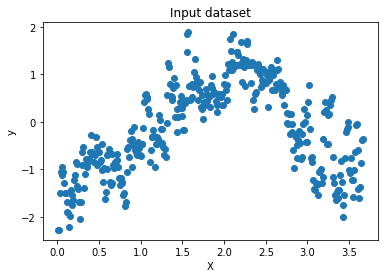

In [263]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=df1980['HEATHROW_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [264]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
df1980['HEATHROW_temp_mean'].min()

-2.2729064917762054

In [265]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
df1980['HEATHROW_temp_mean'].max()

1.8852559183376227

In [266]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [267]:
compute_cost(X,y)

array([0.45504387])

In [268]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [269]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=50 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 15.6 ms
Wall time: 39.9 ms


In [270]:
theta

array([[-0.37276091],
       [ 0.14539831]])

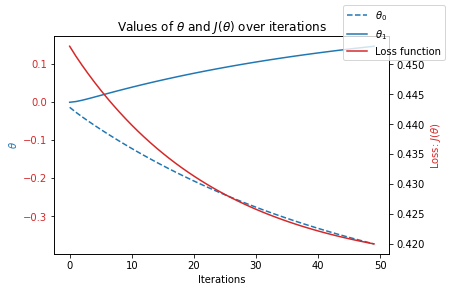

In [271]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [272]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.06 s
Wall time: 2.8 s


In [273]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

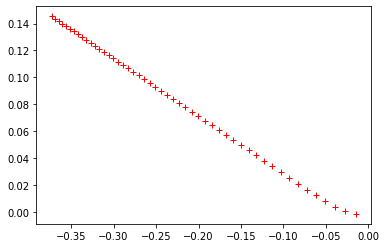

In [274]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [275]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=100 #<---start with the same iterations as above
theta_init=np.array([[0.18],[0.05]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

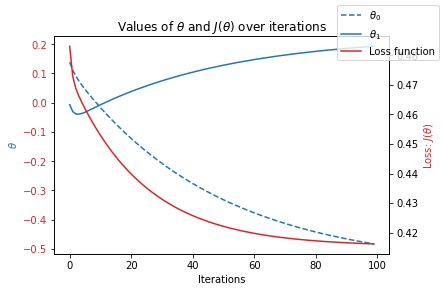

In [276]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history1, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history1, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history1, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

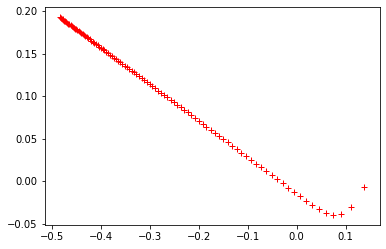

In [277]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

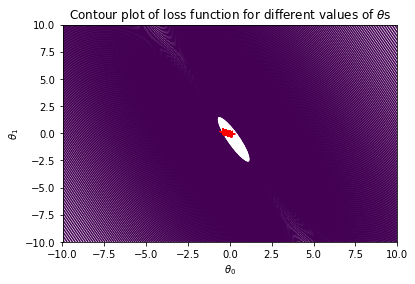

In [278]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()